In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [3]:
land_data = pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/Cocoa Production/Land Usage/land_use.csv')

In [4]:
land_data.head(5)

,Country,Year,Agricultural irrigated land (% of total agriculture),Agricultural land (% of land area),Agricultural land (sq. km),Arable land (% of land area),Arable land (hectares per person),Land area (sq. km),Forest area (% of land area)
0,Ghana,1990,NaN,55.396853,126050.0,11.866046,0.174791,227540.0,43.62
1,Ghana,1991,NaN,55.902259,127200.0,12.305529,0.176729,227540.0,43.14
2,Ghana,1992,NaN,55.902259,127200.0,12.305529,0.172397,227540.0,42.67
3,Ghana,1993,NaN,56.253845,128000.0,12.305529,0.168233,227540.0,42.20
4,Ghana,1994,NaN,56.693329,129000.0,12.305529,0.164311,227540.0,41.72


In [5]:
land_data.tail(5)

,Country,Year,Agricultural irrigated land (% of total agriculture),Agricultural land (% of land area),Agricultural land (sq. km),Arable land (% of land area),Arable land (hectares per person),Land area (sq. km),Forest area (% of land area)
26,Ghana,2016,NaN,55.653336,126633.6,11.863409,0.091337,227540.0,34.82
27,Ghana,2017,NaN,55.453810,126179.6,11.655094,0.087750,227540.0,35.00
28,Ghana,2018,NaN,55.406258,126071.4,11.446779,0.084371,227540.0,35.03
29,Ghana,2019,NaN,55.391316,126037.4,11.239343,0.081130,227540.0,35.06
30,Ghana,2020,NaN,55.393020,126037.4,11.046310,0.078103,227533.0,35.10


In [6]:
land_data.dtypes

Country                                                  object
Year                                                      int64
Agricultural irrigated land (% of total agriculture)    float64
Agricultural land (% of land area)                      float64
Agricultural land (sq. km)                              float64
Arable land (% of land area)                            float64
Arable land (hectares per person)                       float64
Land area (sq. km)                                      float64
Forest area (% of land area)                            float64
dtype: object

In [8]:
land_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Country                                               31 non-null     object 
 1   Year                                                  31 non-null     int64  
 2   Agricultural irrigated land (% of total agriculture)  9 non-null      float64
 3   Agricultural land (% of land area)                    31 non-null     float64
 4   Agricultural land (sq. km)                            31 non-null     float64
 5   Arable land (% of land area)                          31 non-null     float64
 6   Arable land (hectares per person)                     31 non-null     float64
 7   Land area (sq. km)                                    31 non-null     float64
 8   Forest area (% of land area)                          31 non-nu

In [9]:
land_data.dtypes

Country                                                  object
Year                                                      int64
Agricultural irrigated land (% of total agriculture)    float64
Agricultural land (% of land area)                      float64
Agricultural land (sq. km)                              float64
Arable land (% of land area)                            float64
Arable land (hectares per person)                       float64
Land area (sq. km)                                      float64
Forest area (% of land area)                            float64
dtype: object

In [10]:
land_data.columns

Index(['Country', 'Year',
       'Agricultural irrigated land (% of total agriculture)',
       'Agricultural land (% of land area)', 'Agricultural land (sq. km)',
       'Arable land (% of land area)', 'Arable land (hectares per person)',
       'Land area (sq. km)', 'Forest area (% of land area)'],
      dtype='object')

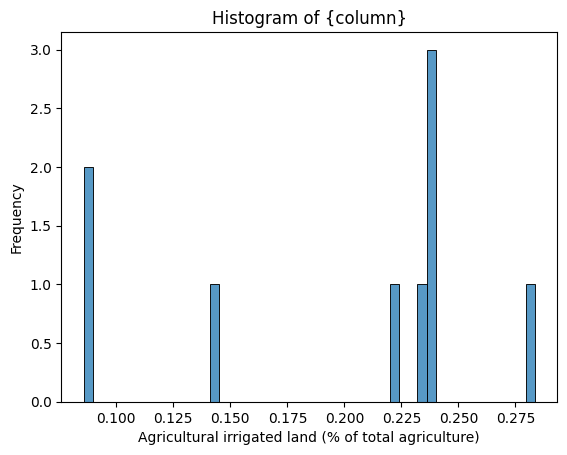

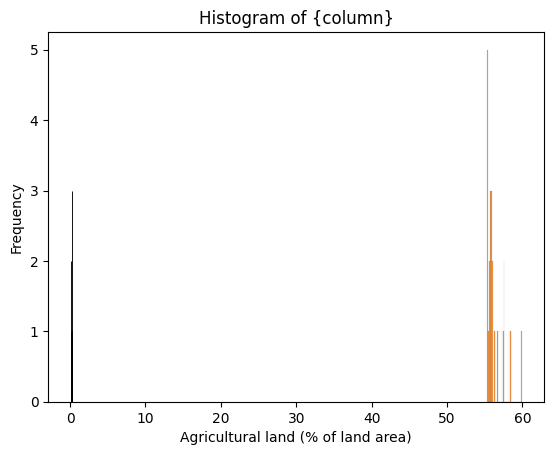

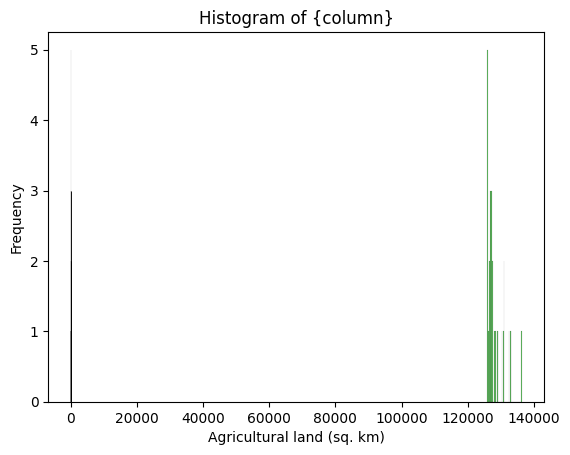

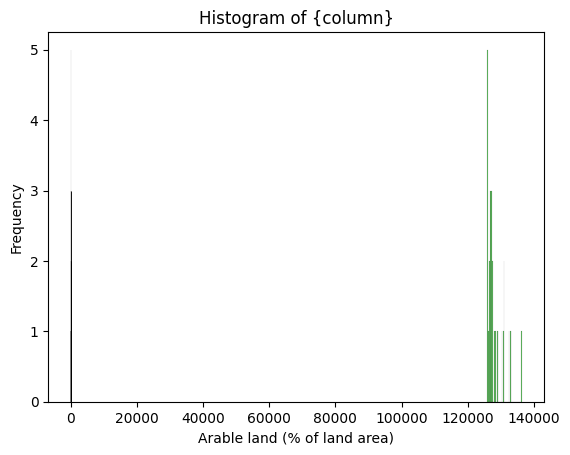

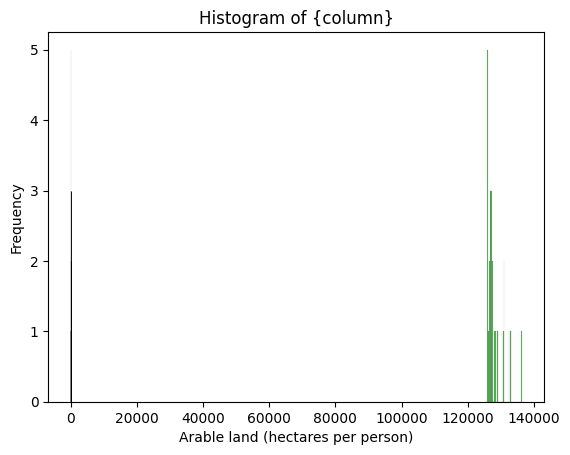

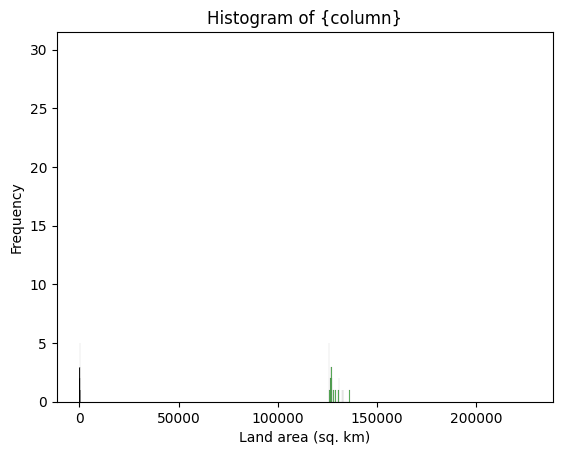

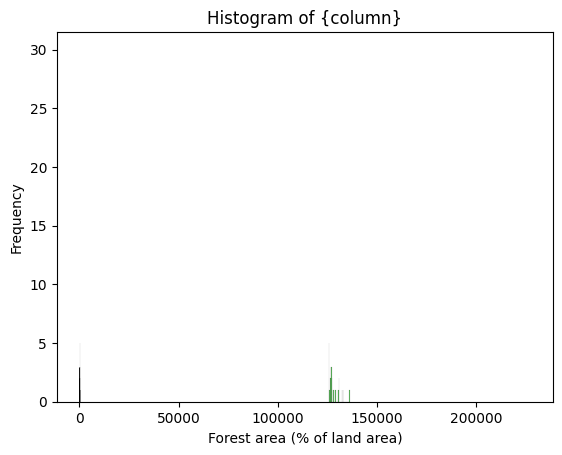

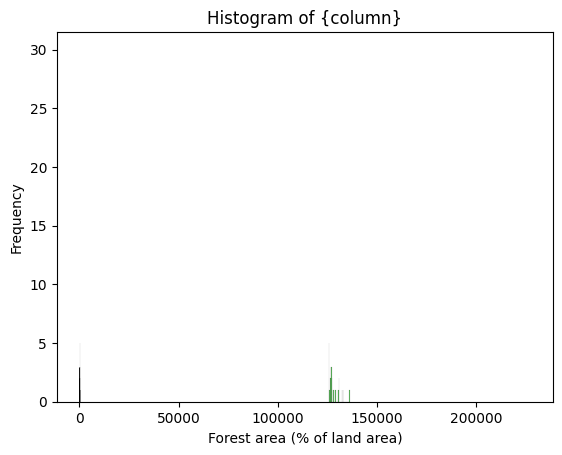

In [11]:
# What is the distribution of different land usage variables?
# Data lacks variance

# Selecting numeric columns (excluding 'Year') for creating histograms
numeric_columns = ['Agricultural irrigated land (% of total agriculture)',
                   'Agricultural land (% of land area)',
                   'Agricultural land (sq. km)',
                   'Arable land (% of land area)',
                   'Arable land (hectares per person)',
                   'Land area (sq. km)',
                   'Forest area (% of land area)']

# Creating histograms for each numeric column
for column in numeric_columns:
    sns.histplot(x=land_data[column], bins=50)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Histogram of {column}')
    plt.show(0)

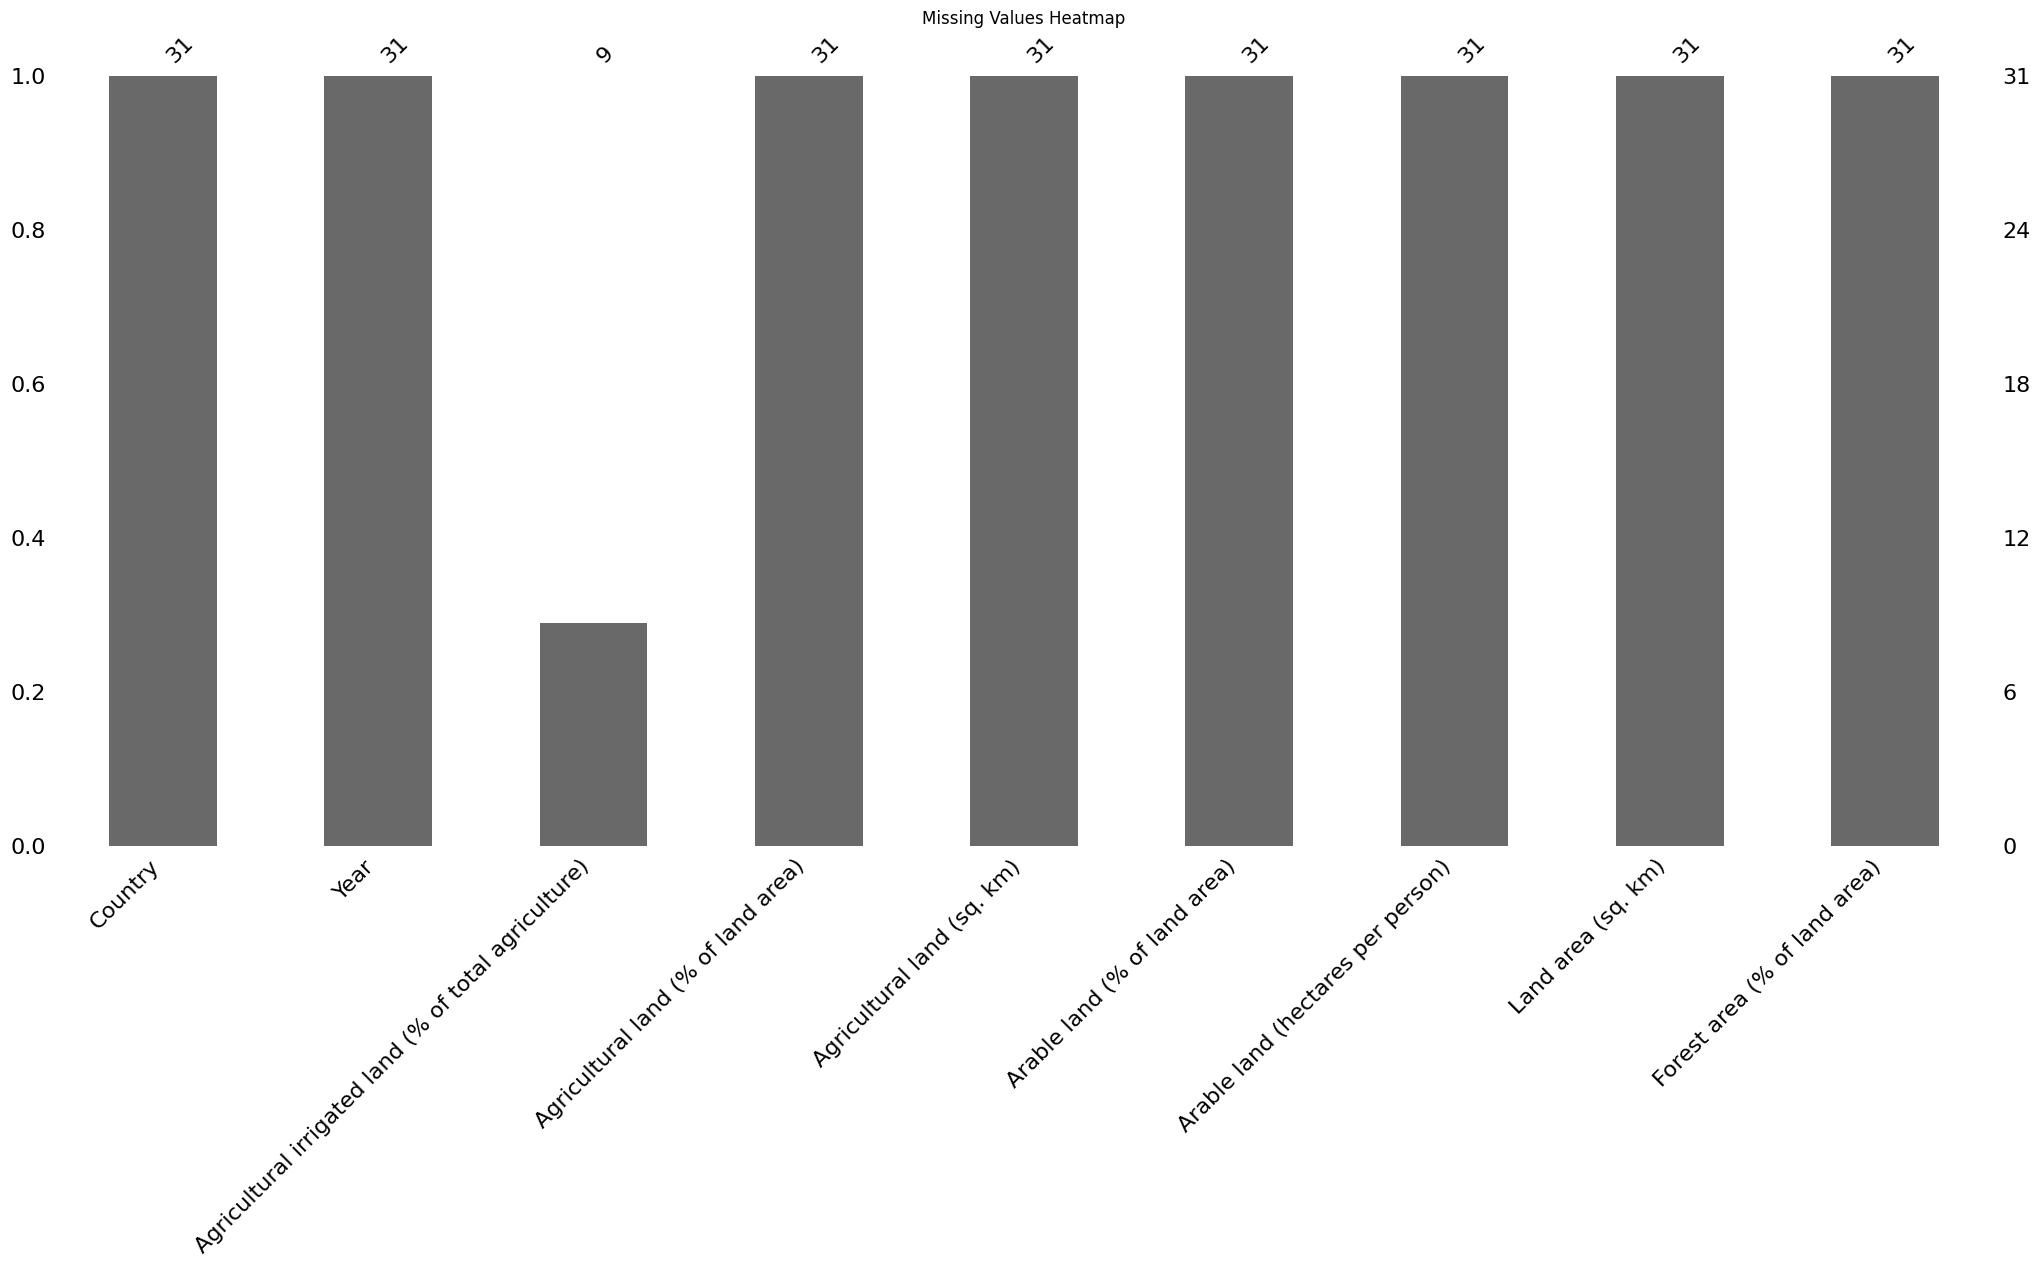

In [16]:
# Are there any gaps or missing values in the dataset? Yes, they are are missing values.
# 
msno.bar(land_data)

# Customize the plot
plt.title('Missing Values Heatmap')
plt.show()


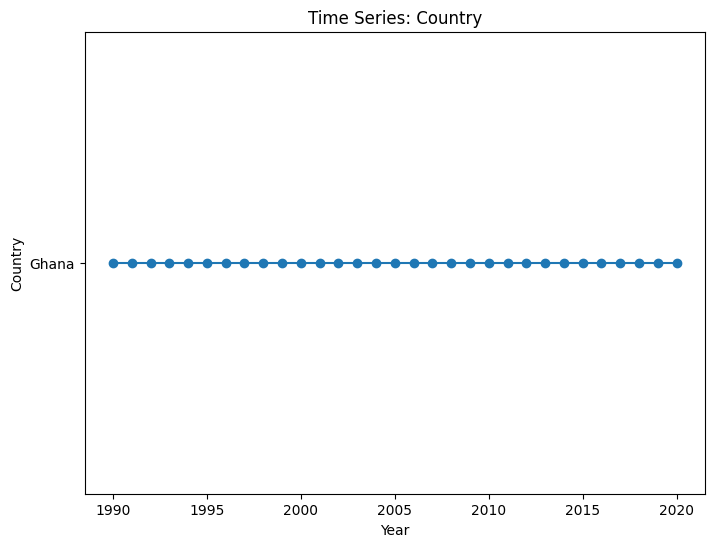

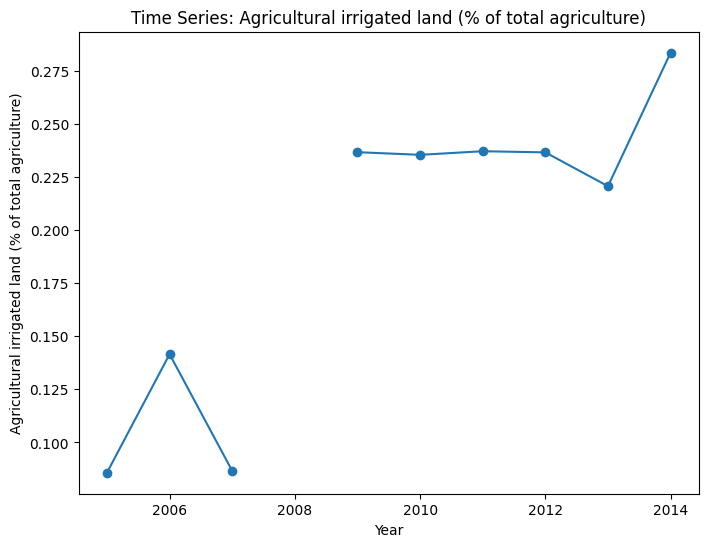

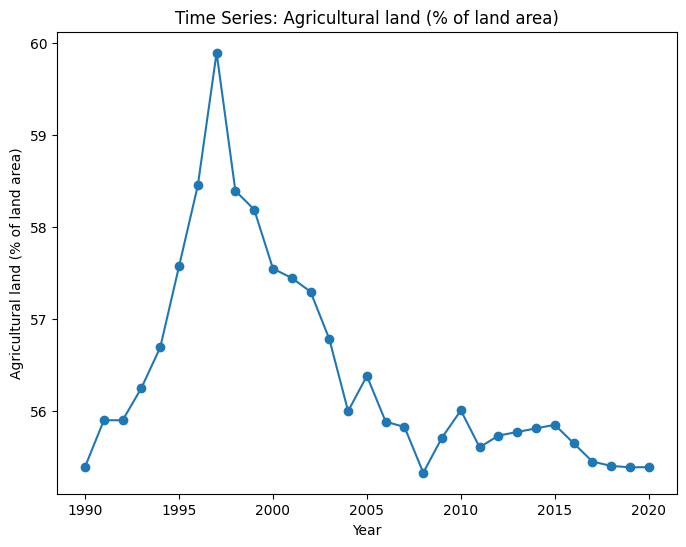

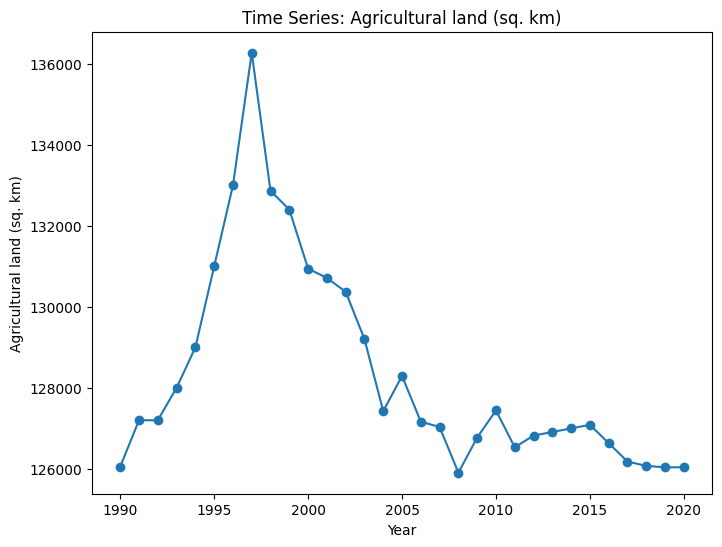

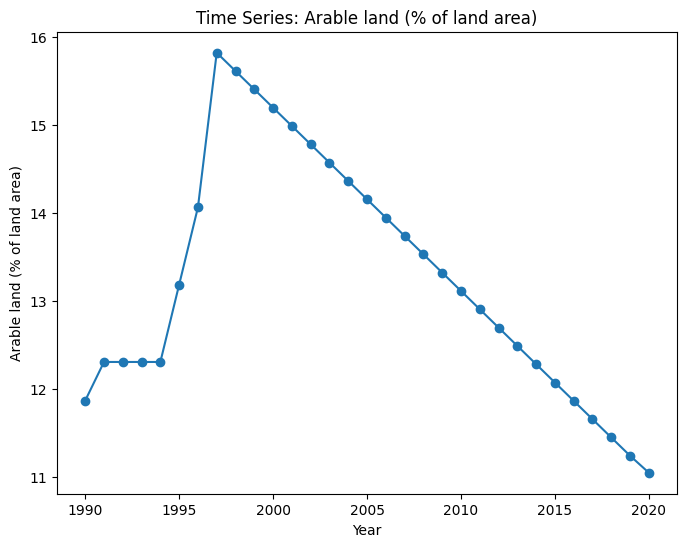

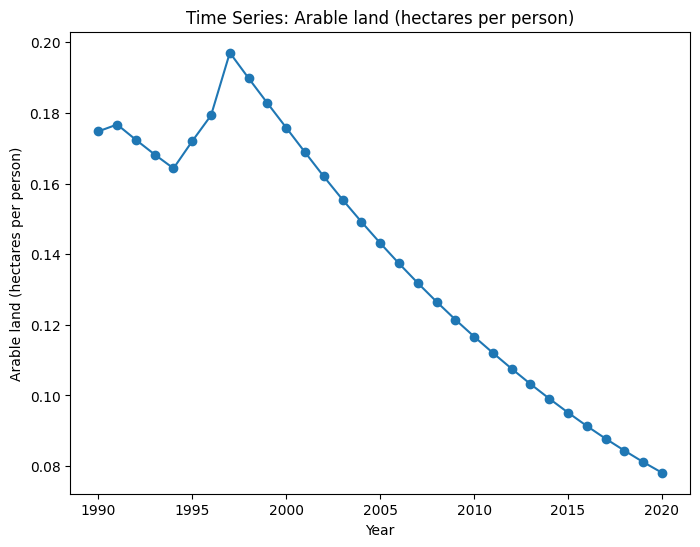

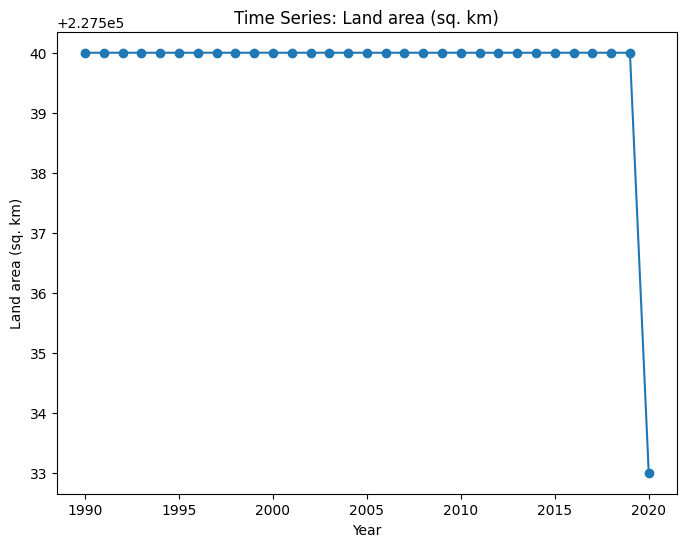

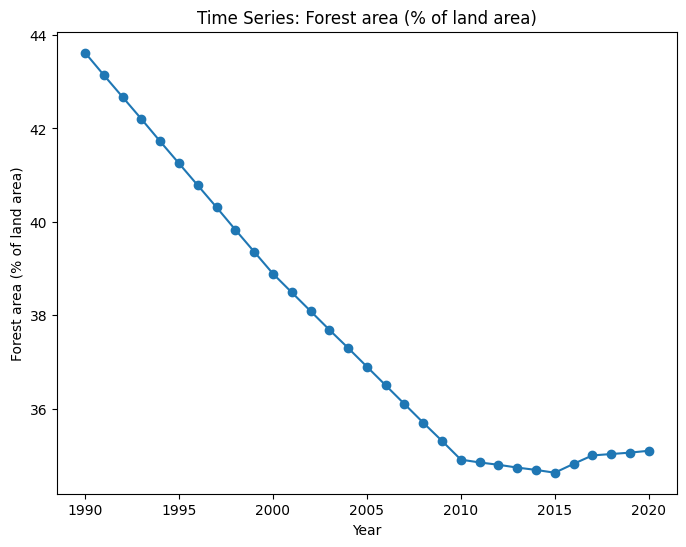

In [21]:
# Are there any gaps in data?
# Agricultural irrigated land (% of total agriculture) has large gaps in values. 


# Iterate over the columns
for col in land_data.columns:
    if col != 'Year':  # Skip the 'Year' column
        # Create a new figure for each column
        plt.figure(figsize=(8, 6))
        
        # Create a line plot
        plt.plot(land_data['Year'], land_data[col], marker='o')
        
        # Find the missing values
        missing_indices = land_data[col].isnull()
        
        # Plot missing values as red crosses
        if missing_indices.any():
            plt.plot(land_data['Year'][missing_indices], land_data[col][missing_indices], 'rx', markersize=8)
        
        # Set the plot title and axis labels
        plt.title(f'Time Series: {col}')
        plt.xlabel('Year')
        plt.ylabel(col)
        
        # Show the plot
        plt.show()


In [25]:
# Drop the column
land_data.drop(columns=['Agricultural irrigated land (% of total agriculture)'], inplace=True)

In [27]:
# What is the trend in agricultural land (% of land area) over time? Are there any significant fluctuations or changes?


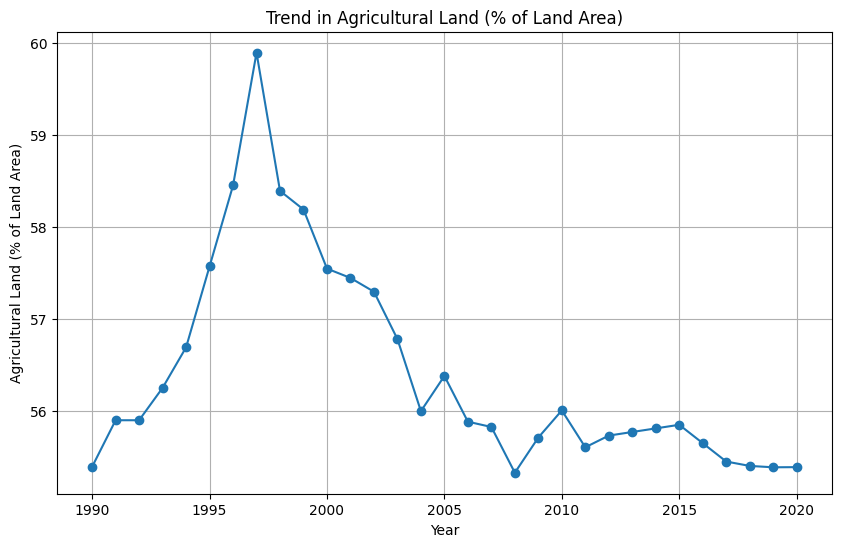

In [30]:
# What is the trend in agricultural land (% of land area) over time? Are there any significant fluctuations or changes?

# Between the years 1990 and 1999, the agricultural land usage reached its highest point.
# However, subsequent to that period, there was  a significant decline in agricultural land usage until early 2000s.
# After 2005, the trend in agricultural land usage displays random fluctuations, with periods of both increase and decrease. 
# However, overall, the usage of agricultural land has remained relatively steady since the 2010s.


sorted_data = land_data.sort_values('Year')

# Plot the trend in agricultural land (% of land area)
plt.figure(figsize=(10, 6))
plt.plot(sorted_data['Year'], sorted_data['Agricultural land (% of land area)'], marker='o')
plt.title('Trend in Agricultural Land (% of Land Area)')
plt.xlabel('Year')
plt.ylabel('Agricultural Land (% of Land Area)')
plt.grid(True)
plt.show()


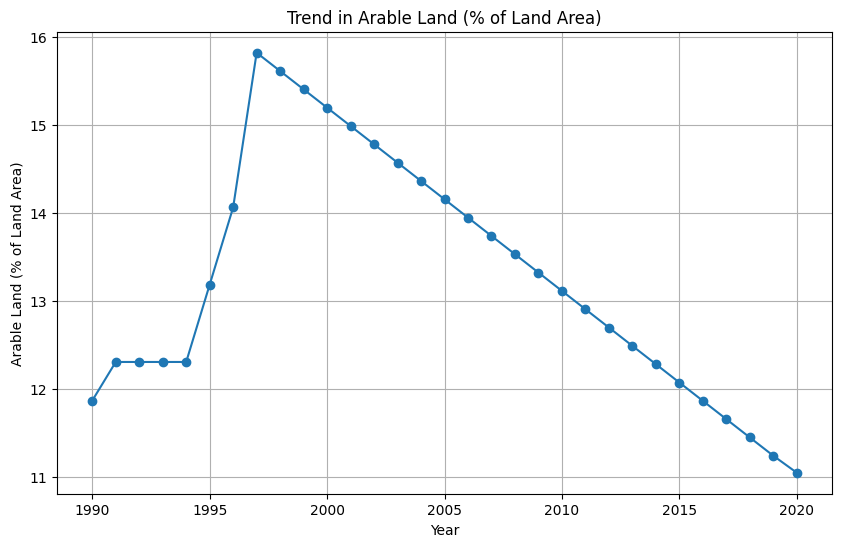

In [33]:
# What is the trend in arable  land (% of land area) over time? Are there any significant fluctuations or changes?
# Following its peak in the mid to late 1990s, the utilization of arable land has exhibited a consistent downward trend, 
# reaching its lowest point in 2020.
# Plot the trend in arable land (% of land area)
plt.figure(figsize=(10, 6))
plt.plot(land_data['Year'], land_data['Arable land (% of land area)'], marker='o')
plt.title('Trend in Arable Land (% of Land Area)')
plt.xlabel('Year')
plt.ylabel('Arable Land (% of Land Area)')
plt.grid(True)
plt.show()


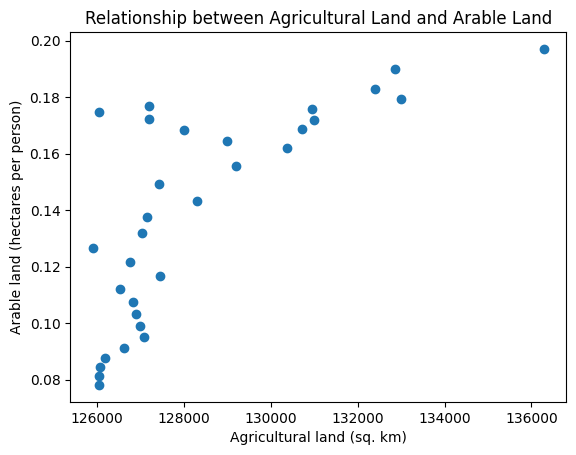

In [34]:
# Is there a relationship between arable land(hectares per person) and Agricultural land(sq.km)?
# There is a moderate strong positive correleation between the two variables.

plt.scatter(land_data['Agricultural land (sq. km)'], land_data['Arable land (hectares per person)'])

# Set the plot title and axis labels
plt.title('Relationship between Agricultural Land and Arable Land')
plt.xlabel('Agricultural land (sq. km)')
plt.ylabel('Arable land (hectares per person)')

# Show the plot
plt.show()


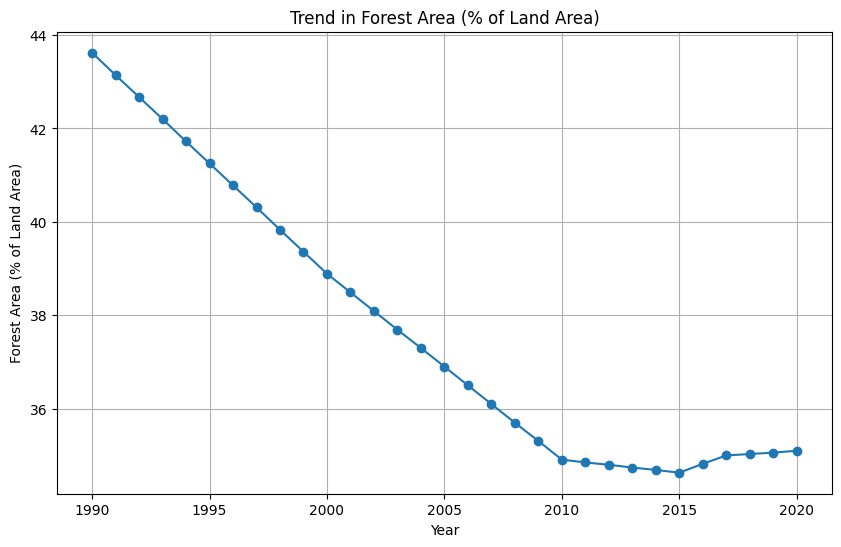

In [36]:
# How has the forest area as a percentage of land area changed over time?
# Forest area u has experienced a gradual upward trend since the 2010s.


# Plot the trend in forest area (% of land area)
plt.figure(figsize=(10, 6))
plt.plot(land_data['Year'], land_data['Forest area (% of land area)'], marker='o')
plt.title('Trend in Forest Area (% of Land Area)')
plt.xlabel('Year')
plt.ylabel('Forest Area (% of Land Area)')
plt.grid(True)
plt.show()



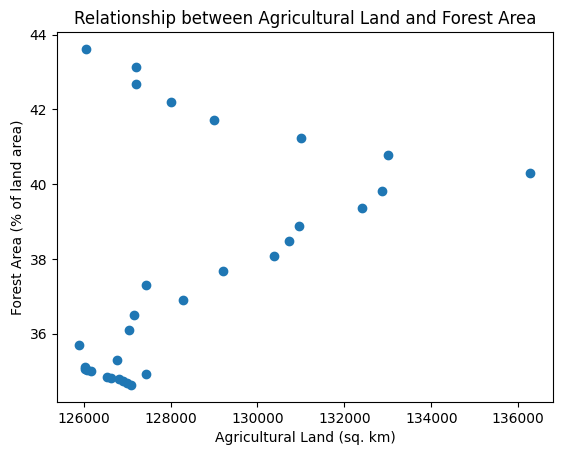

In [37]:
# Is there a relationship between agricultural land and forest land ?
# There is a moderate relationship between agricultural land and forest land.

# Create a scatter plot
plt.scatter(land_data['Agricultural land (sq. km)'], land_data['Forest area (% of land area)'])

# Set the plot title and axis labels
plt.title('Relationship between Agricultural Land and Forest Area')
plt.xlabel('Agricultural Land (sq. km)')
plt.ylabel('Forest Area (% of land area)')

# Show the plot
plt.show()

C:\Users\chimi\AppData\Local\Temp\ipykernel_19188\1078163778.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(land_data.corr(), cmap='coolwarm')


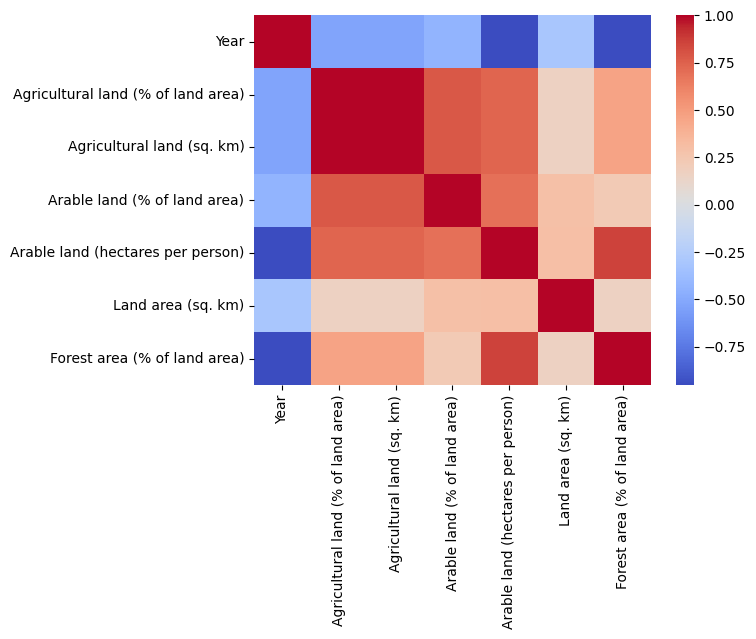

In [45]:
# Arable lands and agricultural land have a moderately positive correlation, showing that a larger
# amount of arable land is often available per person in areas with more agricultural land.
# There is a strong positive correlation between the availability of arable land per person and the forest
# area as a % of land area, inidcating a higher releative forest area tend to have a higher availability of arable land per person.


# Create a heatmap of the correlation matrix
sns.heatmap(land_data.corr(), cmap='coolwarm')

# Show the plot
plt.show()

In [44]:
# Calculate the correlations
correlation_matrix = land_data.corr()

# Print the correlations
print(correlation_matrix)


                                        Year  \
Year                                1.000000   
Agricultural land (% of land area) -0.531167   
Agricultural land (sq. km)         -0.531225   
Arable land (% of land area)       -0.435209   
Arable land (hectares per person)  -0.945277   
Land area (sq. km)                 -0.306186   
Forest area (% of land area)       -0.952007   

                                    Agricultural land (% of land area)  \
Year                                                         -0.531167   
Agricultural land (% of land area)                            1.000000   
Agricultural land (sq. km)                                    1.000000   
Arable land (% of land area)                                  0.782160   
Arable land (hectares per person)                             0.739393   
Land area (sq. km)                                            0.166848   
Forest area (% of land area)                                  0.464995   

                      

C:\Users\chimi\AppData\Local\Temp\ipykernel_19188\844972312.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = land_data.corr()


In [ ]:
# Save the new file with the dropped column
land_data.to_csv('land_usagefinal.csv',index=False)